# Author :- Viplav Mankar

# <center>Task 2 :- Prediction using Unsupervised ML

<h2> <u>Objective</u> :- From the given ‘Iris’ dataset, predict the optimum number of clusters and <br><br>represent it visually

## Step 1 :- Importing Libraries
<h3> <ul> Pandas :- Pandas is used to analyze data<br><br>
  Sklearn :- Sklearn is the most useful and robust library for Machine Learning<br><br>
  Matplotlib :- Matplotlib is used for data visualization<br><br>
  MinMaxScaler :- Transform features by scaling each feature to a given range

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

## Step 2 :- Loading csv file
<h3><ul> df :- Dataframe object to store the data <br><br>
iris.csv :- Excel sheet contains the dataset

In [14]:
df = pd.read_csv("./iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Step 3 :- Making the k means model
<h3><ul> km :- Has the KMeans model with 3 clusters <br>

In [15]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Step 4 :- Changing the type of 'Species' column from text to int
<h3><ul> The data science models work on Numerical values and 'Species' column contains string values. <br>

In [16]:
df["Species"] = df["Species"].astype('category')
df["Species_"] = df["Species"].cat.codes
df.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


## Step 5 :- The plot of data based on Sepal Length to Sepal Width
<h3><ul> Scatter Plot :- A scatter plot is a diagram where each value in the data set is represented by a dot. <br><br>

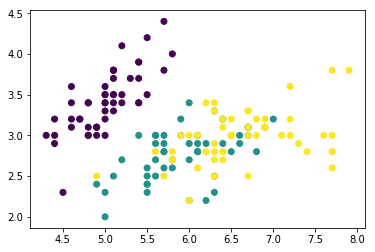

In [17]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],c=df.Species_)

## Step 6 :- Using MinMaxScaler to transform the data in 0-1 range
<h3><ul> This estimator scales and translates each feature individually such that it is in the given range on the training <br><br>set, e.g. between 0 and 1. <br><br>

In [21]:
scaler = MinMaxScaler()
scaler.fit(df[['SepalLengthCm']])
df['SepalLengthCm'] = scaler.transform(df[['SepalLengthCm']])

scaler.fit(df[['SepalWidthCm']])
df['SepalWidthCm'] = scaler.transform(df[['SepalWidthCm']])

scaler.fit(df[['PetalLengthCm']])
df['PetalLengthCm'] = scaler.transform(df[['PetalLengthCm']])

scaler.fit(df[['PetalWidthCm']])
df['PetalWidthCm'] = scaler.transform(df[['PetalWidthCm']])

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa,0
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa,0
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa,0
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa,0
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,0.666667,0.416667,0.711864,0.916667,Iris-virginica,2
146,147,0.555556,0.208333,0.677966,0.750000,Iris-virginica,2
147,148,0.611111,0.416667,0.711864,0.791667,Iris-virginica,2
148,149,0.527778,0.583333,0.745763,0.916667,Iris-virginica,2


## Step 7 :- Fitting and predicting using the model
<h3><ul> fit_predict :- Compute cluster centers and predict cluster index for each sample. <br><br>

In [22]:
y_predicted = km.fit_predict(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Step 8 :- Making a new column named cluster to plot the graph
<h3><ul>df['cluster'] :- This column has the predicted cluster index for each point in the dataset.</h3>

In [23]:
df['cluster'] = y_predicted
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_,cluster
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa,0,0
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa,0,0
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa,0,0
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa,0,0
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa,0,0


## Step 9 :- Scatter plot to show the predictions
<h3><ul> Red points show the centroids of each cluster, which shows how the closest points are taken in a cluster. <br><br>

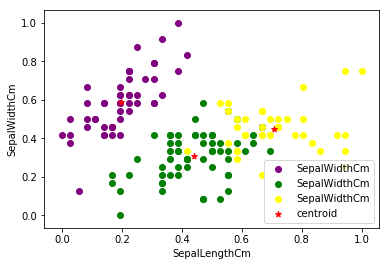

In [24]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],color='purple')
plt.scatter(df2['SepalLengthCm'],df2['SepalWidthCm'],color='green')
plt.scatter(df3['SepalLengthCm'],df3['SepalWidthCm'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*',label='centroid')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

## The output predictions can be shown using model.labels_

In [25]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Step 10 :- Crosstab to show the results
<h3><ul> Crosstab :-  Computes a frequency table of the factors/attributes. <br><br>

In [26]:
pd.crosstab(df['Species_'],km.labels_)

col_0,0,1,2
Species_,,,
0,50,0,0
1,0,47,3
2,0,14,36


## Step 11 :- Elbow Method

<h3><ul>
    Elbow Method :- This method is used to know how many clusters should be used to get the maximum correct output on our predictions.<br><br>
    Inertia :- It is the sum of squared distances of samples to their closest cluster center.<br><br>
    sse :- Sum of squared errors.

In [72]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)

In [73]:
sse

[41.138172022977756,
 12.14368828157972,
 6.998114004826761,
 5.532831003081898,
 4.571923613060553,
 3.991843807692821,
 3.4705637901372084,
 3.1758809886232817,
 2.8583905978057107]

<h3>The cluster count at '3' has moderate but optimal error in training and test data. <br><br>
The clusters count above '3' has less error in training data, but has higher errors in test data.

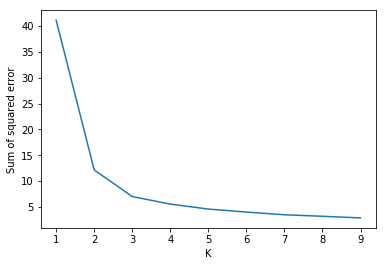

In [74]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## 